<a href="https://colab.research.google.com/github/harshiitk1109/Demystifying-ML/blob/main/Demystifying_MLAlgorithms_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1                     
Fit y = sin(x)
using yn = β0 + β1x + β2x^2 + β3x^3

Find the weights using Mean Square Loss Function and only the given libraries and Gradient Descent optimization (iterations = 100000, learning rate = 0.001)

Plot y and yn with respect to x (use scatter plot: plt.scatter())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
x=np.random.uniform(-math.pi/2,math.pi/2,10)
print(x)
y=np.zeros(np.size(x))
for i in range(np.size(y)):
  y[i]=math.sin(x[i])
print(y)

[-1.52543852  0.06453619 -0.77915365  1.44408352 -0.75589462  0.99343382
  0.54351657  0.89980208 -0.0204989   1.14351907]
[-0.99897151  0.0644914  -0.70267749  0.99198267 -0.68593992  0.83790515
  0.517149    0.78320387 -0.02049746  0.91009741]


[-1.1516922  -0.85170888  0.29424159 -1.31771451  0.07129795 -0.74824973
  0.45584146  0.64707887  0.95120478  1.53398717]
[-0.91345388 -0.75240714  0.29001412 -0.96814537  0.07123756 -0.68035706
  0.44021801  0.60285836  0.81411571  0.99932262]
Iteration = 0, Loss = 3.8992670369060263
Iteration = 1000, Loss = 0.1360687915017397
Iteration = 2000, Loss = 0.0963106466878518
Iteration = 3000, Loss = 0.08099470489654914
Iteration = 4000, Loss = 0.06883426088763953
Iteration = 5000, Loss = 0.05880110432248538
Iteration = 6000, Loss = 0.05039707892286756
Iteration = 7000, Loss = 0.043286997566969646
Iteration = 8000, Loss = 0.037231554718658924
Iteration = 9000, Loss = 0.03205178313060317
Iteration = 10000, Loss = 0.027608468734456475
Iteration = 11000, Loss = 0.023789904937607798
Iteration = 12000, Loss = 0.020504368930130606
Iteration = 13000, Loss = 0.017675308701986428
Iteration = 14000, Loss = 0.01523811668842863
Iteration = 15000, Loss = 0.013137857375630325
Iteration = 16000, Loss = 0

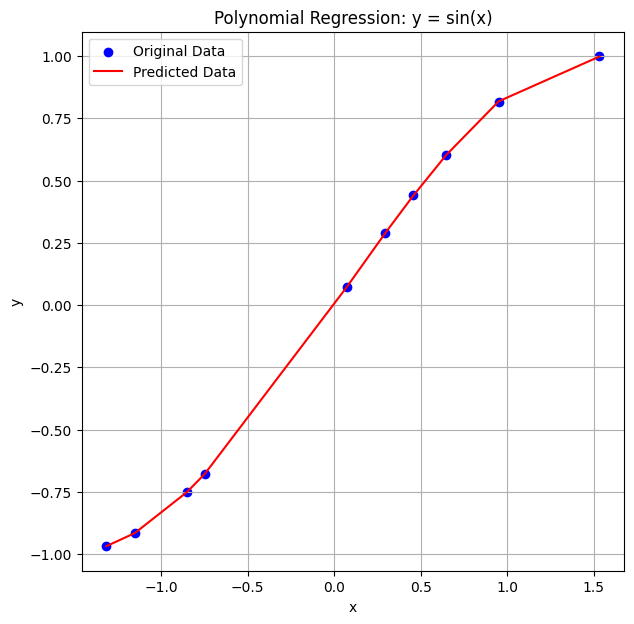

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
x=np.random.uniform(-math.pi/2,math.pi/2,10)
print(x)
y=np.zeros(np.size(x))
for i in range(np.size(y)):
  y[i]=math.sin(x[i])
print(y)

class PolynomialRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        β0 = self.parameters['β0']
        β1 = self.parameters['β1']
        β2 = self.parameters['β2']
        β3 = self.parameters['β3']
        predictions = β0 + β1 * train_input + β2 * train_input**2 + β3 * train_input**3
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dβ1 = np.mean(np.multiply(train_input, df))
        dβ2 = np.mean(np.multiply(train_input**2, df))
        dβ3 = np.mean(np.multiply(train_input**3, df))
        dβ0 = np.mean(df)
        derivatives['dβ0'] = dβ0
        derivatives['dβ1'] = dβ1
        derivatives['dβ2'] = dβ2
        derivatives['dβ3'] = dβ3
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['β0'] -= learning_rate * derivatives['dβ0']
        self.parameters['β1'] -= learning_rate * derivatives['dβ1']
        self.parameters['β2'] -= learning_rate * derivatives['dβ2']
        self.parameters['β3'] -= learning_rate * derivatives['dβ3']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['β0'] = np.random.uniform(0, 1)* -1
        self.parameters['β1'] = np.random.uniform(0, 1)* -1
        self.parameters['β2'] = np.random.uniform(0, 1)* -1
        self.parameters['β3'] = np.random.uniform(0, 1)* -1

        self.loss = []
        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            if i % 1000 == 0:
                print("Iteration = {}, Loss = {}".format(i , cost))

        return self.parameters, self.loss

Polynomial_reg = PolynomialRegression()
loss_history = Polynomial_reg.train(x, y,0.001, 100000)
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

plt.figure(figsize=(7, 7))
plt.scatter(x_sorted, y_sorted, color='blue', label='Original Data')
plt.plot(x_sorted,Polynomial_reg.forward_propagation(x_sorted), color='red', label='Predicted Data')
plt.title('Polynomial Regression: y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()